In [12]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# 加载数据

In [8]:
(X_train, _), (X_test, _) = mnist.load_data()

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
# 展示前 m*n 个数字
def show_mnist(train_image):
    n = 4
    m = 4
    fig = plt.figure()
    for i in range(n):
        for j in range(m):
            plt.subplot(n, m, i*n+j+1)
            plt.subplots_adjust(wspace=0.2, hspace=2)
            index = i * n + j  # 当前图片的标号
            img_array = train_image[index]
            img = Image.fromarray(img_array)
            plt.imshow(img)
    plt.show()

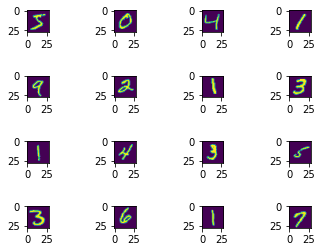

In [13]:
show_mnist(X_train)

# 数据预处理

In [14]:
# 将数据维度进行处理: 将每个像素变成一个列表，即从 60000*28*28 变为 60000*28*28*1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
# 进行归一化处理，变成0-1内的小数
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

In [16]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
# 转为一维向量
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [18]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# 构造自动编码器

## 单层

In [75]:
# input_size = 784
# hidden_size = 64
# output_size = 784

# x = Input(shape=(input_size,))
# h = Dense(hidden_size, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01))(x)
# r = Dense(output_size, activation='sigmoid', kernel_regularizer=keras.regularizers.l1(0.01))(h)

# autoencoder = Model(inputs=x, outputs=r)

## 多层，编码器、解码器各有一个隐层

In [76]:
# input_size = 784
# hidden_size = 128
# code_size = 64

# x = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size, activation='relu')(x)
# h = Dense(code_size, activation='relu')(hidden_1)
# hidden_2 = Dense(hidden_size, activation='relu')(h)
# r = Dense(input_size, activation='sigmoid')(hidden_2)

# autoencoder = Model(inputs=x, outputs=r)

## 多层，编码器、解码器各有两个隐层

In [82]:
input_size = 784
hidden_size_1 = 256
hidden_size_2 = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation='relu')(x)
hidden_2 = Dense(hidden_size_2, activation='relu')(hidden_1)
h = Dense(code_size, activation='relu')(hidden_2)
hidden_3 = Dense(hidden_size_2, activation='relu')(h)
hidden_4 = Dense(hidden_size_1, activation='relu')(hidden_3)
r = Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = Model(inputs=x, outputs=r)

In [83]:
# 编译网络模型
autoencoder.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

# 训练

In [84]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0379 - accuracy: 0.0106 - val_loss: 0.0181 - val_accuracy: 0.0110
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0152 - accuracy: 0.0132 - val_loss: 0.0126 - val_accuracy: 0.0149
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0117 - accuracy: 0.0123 - val_loss: 0.0106 - val_accuracy: 0.0149
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0100 - accuracy: 0.0125 - val_loss: 0.0091 - val_accuracy: 0.0145
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0089 - accuracy: 0.0124 - val_loss: 0.0083 - val_accuracy: 0.0164


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


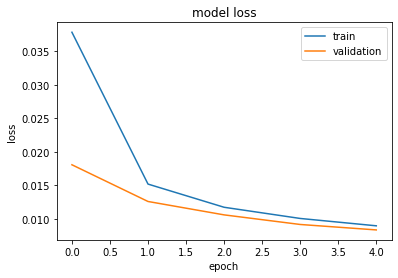

In [85]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 预测

In [86]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


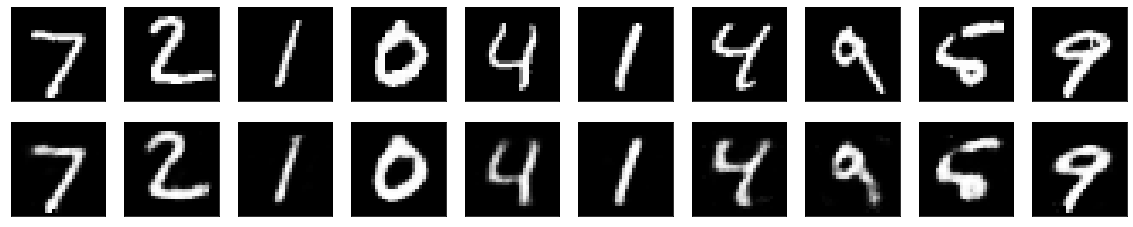

In [87]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()